In [1]:
import os
import pandas as pd

In [2]:
business = pd.read_json("../0_data/1_raw_data/business.json",
                       lines=True)

In [3]:
business.shape

(192609, 14)

In [13]:
def split_cats(text):
    try:
        return x.split(", ")
    except:
        return []

In [14]:
condition2 = business["categories"].apply(lambda x: "restaurant" in split_cats(x))

In [15]:
business_open = business[business["is_open"]==1 & condition2]

In [16]:
business_open.shape

(34084, 14)

In [17]:
business_open.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [18]:
stars = business_open.groupby("stars").count()["address"].reset_index()

In [19]:
stars.columns = ["stars", "count"]

In [20]:
stars.shape

(9, 2)

In [22]:
stars

,stars,count
0,1.0,600
1,1.5,797
2,2.0,1951
3,2.5,3600
4,3.0,5950
5,3.5,7465
6,4.0,6848
7,4.5,4099
8,5.0,2774


#### Get graph of stars distribution

In [23]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

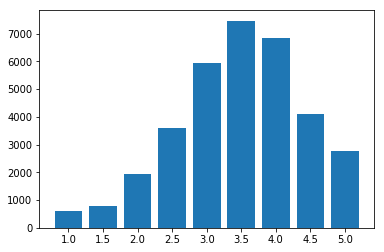

In [24]:
plt.bar(stars["stars"].apply(lambda x: str(x)), stars["count"])

try with seaborn

In [26]:
import seaborn as sns

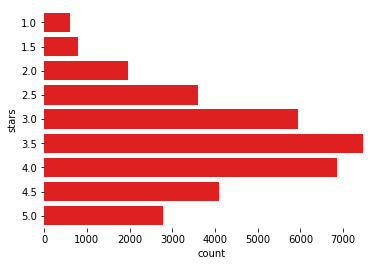

In [27]:
sns.barplot(y=stars["stars"].apply(lambda x: str(x)), x=stars["count"],
            color="red", orient="h")
sns.despine(left=True, bottom=True)

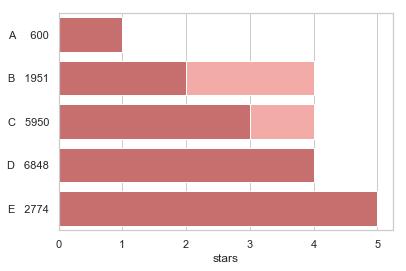

In [31]:
sns.set(style="whitegrid")

tmp_data = pd.DataFrame({"col1": [1, 4, 4, 4, 5],
                         "col2": ["A     600", "B   1951", "C   5950", "D   6848", "E   2774"]})

sns.set_color_codes("pastel")
f, ax = plt.subplots()
sns.barplot(x="col1",
            y="col2",
            data=tmp_data,
            color="r", orient="h")
ax.set(xlabel="stars", ylabel="")

sns.set_color_codes("muted")
sns.barplot(x=[1,2,3,4,5],
            y=["A     600", "B   1951", "C   5950", "D   6848", "E   2774"],
            color="r", orient="h")
ax.set(xlabel="stars", ylabel="")

f.savefig("../3_reports/figures/business_stars2.png")

In [34]:
((1951/1500000) * .2 + (5950/1500000) * .1) * 863000000

566818.4000000001

#### Model Performance

In [86]:
# os.chdir("1_feature_engineering")
exec(open("extract_review_features.py").read())

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [87]:
feature_matrix = produce_feature_matrix(data2)

Preprocessing (P): 3.5770504474639893
Preprocessing2 (P): 3.041956901550293
TFIDF: 0.053965091705322266
Topics: 0.41849470138549805


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:604: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Metadata: 0.6005206108093262


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:753: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Syntax: 3.183506965637207
Embeddings: 12.020823240280151


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:474: RuntimeWarning: invalid value encountered in double_scalars


In [88]:
feature_matrix.shape

(1050, 368)

In [89]:
feature_matrix.head()

,text_formatted,sen_len,sen_avg_len,sen_med_len,NOUN,VERB,ADJ,ADV,.,ADP,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
0,In my dream world this amazing incredible plac...,59,5.900000,5.0,-0.889222,-0.718838,-0.823667,-0.943411,-0.418849,-0.679363,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.236909,0.001000,0.001000,0.001000,0.001000
1,Pretty good ramen. It honestly wasn't quite a...,97,4.850000,4.5,-0.791382,-0.641034,-0.823667,0.057682,0.231730,-0.679363,...,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526
2,First time there chicken for both me and my wi...,468,5.032258,5.0,0.627291,0.992857,0.397608,0.391380,0.882309,0.656463,...,0.193696,0.000132,0.000132,0.122451,0.120293,0.000132,0.000132,0.000132,0.000132,0.000132
3,The staff is friendly and service is done quic...,94,5.222222,5.0,-0.693543,-0.718838,-0.917611,-0.776562,-0.418849,1.992289,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556
4,I originally gave Main Ingredient two stars ba...,854,5.239264,5.0,2.143805,0.759444,2.370435,1.225624,0.882309,2.660202,...,0.084085,0.000090,0.000090,0.000090,0.000090,0.017087,0.000090,0.000090,0.052086,0.027683


In [142]:
feature_matrix = feature_matrix.fillna(0)

In [143]:
target = data[["food", "service", "price", "ambiance"]]

In [144]:
exec(open("iterative_stratification.py").read())

In [160]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target),
    test_size=0.4,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.3,
    random_state=10191994)

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=3,
                             min_samples_leaf=10,
                             max_features=0.6,
                             random_state=10191994,
                             n_jobs=-1)

In [164]:
feature_matrix.columns[1:4]

Index(['sen_len', 'sen_avg_len', 'sen_med_len'], dtype='object')

In [165]:
feature_matrix.columns[4:148]

Index(['NOUN', 'VERB', 'ADJ', 'ADV', '.', 'ADP', 'NUM', 'PRON', 'PRT', 'DET',
       ...
       'X_VERB', 'X_ADJ', 'X_ADV', 'X_.', 'X_ADP', 'X_NUM', 'X_PRON', 'X_PRT',
       'X_DET', 'X_CONJ'],
      dtype='object', length=144)

In [166]:
feature_matrix.columns[148:168]

Index(['food_avg_sim', 'service_avg_sim', 'price_avg_sim', 'ambiance_avg_sim',
       'tasty_avg_similarity', 'delicious_avg_similarity',
       'yummy_avg_similarity', 'fast_avg_similarity', 'quick_avg_similarity',
       'line_avg_similarity', 'wait_avg_similarity', 'seated_avg_similarity',
       'expensive_avg_similarity', 'cost_avg_similarity',
       'worth_avg_similarity', 'atmosphere_avg_similarity',
       'environment_avg_similarity', 'patio_avg_similarity',
       'loud_avg_similarity', 'smelly_avg_similarity'],
      dtype='object')

In [167]:
feature_matrix.columns[168:268]

Index(['also', 'alway', 'amaz', 'around', 'ask', 'back', 'bar', 'best',
       'better', 'bit', 'buffet', 'burger', 'came', 'chees', 'chicken', 'come',
       'could', 'day', 'definit', 'delici', 'dessert', 'dinner', 'dish',
       'drink', 'eat', 'enjoy', 'even', 'everyth', 'experi', 'favorit',
       'first', 'flavor', 'food', 'fresh', 'fri', 'friend', 'get', 'go',
       'good', 'got', 'great', 'hour', 'know', 'like', 'littl', 'locat',
       'look', 'lot', 'love', 'made', 'make', 'meal', 'meat', 'menu', 'much',
       'next', 'nice', 'night', 'one', 'order', 'peopl', 'pizza', 'place',
       'pretti', 'price', 're', 'realli', 'recommend', 'restaur', 'right',
       'room', 'salad', 'sauc', 'say', 'seat', 'serv', 'server', 'servic',
       'side', 'star', 'still', 'sweet', 'tabl', 'take', 'tast', 'thing',
       'think', 'time', 'top', 'tri', 'two', 'us', 've', 'vega', 'wait',
       'want', 'way', 'well', 'went', 'would'],
      dtype='object')

In [168]:
feature_matrix.columns[268:368]

Index(['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17',
       'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23',
       'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29',
       'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35',
       'topic_36', 'topic_37', 'topic_38', 'topic_39', 'topic_40', 'topic_41',
       'topic_42', 'topic_43', 'topic_44', 'topic_45', 'topic_46', 'topic_47',
       'topic_48', 'topic_49', 'topic_50', 'topic_51', 'topic_52', 'topic_53',
       'topic_54', 'topic_55', 'topic_56', 'topic_57', 'topic_58', 'topic_59',
       'topic_60', 'topic_61', 'topic_62', 'topic_63', 'topic_64', 'topic_65',
       'topic_66', 'topic_67', 'topic_68', 'topic_69', 'topic_70', 'topic_71',
       'topic_72', 'topic_73', 'topic_74', 'topic_75', 'topic_

In [169]:
target.describe()

,food,service,price,ambiance
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.908571,0.637143,0.263810,0.404762
std,0.288355,0.481053,0.440907,0.491080
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


#### Food

In [170]:
import pickle

In [171]:
def train_model(index):
    if index == 0:
        model = "food"
    elif index == 1:
        model = "service"
    elif index == 2:
        model = "price"
    elif index == 3:
        model = "ambiance"
        
    score_metadata = clf.fit(pd.DataFrame(X_train[:, 1:4])
                             , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:4])
                , y_validation[:, index])
    score_syntax = clf.fit(pd.DataFrame(X_train[:, 1:148])
                           , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:148])
                , y_validation[:, index])
    score_embeddings = clf.fit(pd.DataFrame(X_train[:, 1:168])
                               , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:168])
                , y_validation[:, index])
    score_tfidf = clf.fit(pd.DataFrame(X_train[:, 1:268])
                          , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:268])
                , y_validation[:, index])
    score_topics = clf.fit(pd.DataFrame(X_train[:, 1:368])
                           , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:368])
                , y_validation[:, index])
    with open(
        "../../4_models/rf_{}_50iterations_0.8threshold.pickle"
        .format(model), "rb") as f:
        clf_pseudolabel = pickle.load(f)
        
        score_pseudolabel = clf_pseudolabel.fit(
            pd.DataFrame(X_train[:, 1:368])
            , y_train[:, index]
            ).score(pd.DataFrame(X_validation[:, 1:368])
                    , y_validation[:, index])
        return [score_metadata,
                score_syntax,
                score_embeddings,
                score_tfidf,
                score_topics,
                score_pseudolabel]

In [181]:
food = train_model(0)
service = train_model(1)
price = train_model(2)
ambiance = train_model(3)

In [182]:
food = [0.908571] + food
food

[0.908571,
 0.9148936170212766,
 0.9148936170212766,
 0.8882978723404256,
 0.8936170212765957,
 0.8936170212765957,
 0.8936170212765957]

In [183]:
service = [0.637143] + service
service

[0.637143,
 0.6382978723404256,
 0.648936170212766,
 0.675531914893617,
 0.776595744680851,
 0.7819148936170213,
 0.7819148936170213]

In [184]:
price = [1-0.263810] + price
price

[0.73619,
 0.7340425531914894,
 0.7340425531914894,
 0.7606382978723404,
 0.8031914893617021,
 0.8031914893617021,
 0.8031914893617021]

In [185]:
ambiance = [1-0.404762] + ambiance
ambiance

[0.5952379999999999,
 0.6329787234042553,
 0.648936170212766,
 0.7553191489361702,
 0.75,
 0.723404255319149,
 0.723404255319149]

In [192]:
df = pd.DataFrame({"features": ["0 base",
                                "1 metadata",
                                "2 syntax",
                                "3 embeddings",
                                "4 tfidf",
                                "5 topics",
                                "6 pseudolabel"],
                   "food": food,
                   "service": service,
                   "price": price,
                   "ambiance": ambiance})

In [193]:
df

,features,food,service,price,ambiance
0,0 base,0.908571,0.637143,0.736190,0.595238
1,1 metadata,0.914894,0.638298,0.734043,0.632979
2,2 syntax,0.914894,0.648936,0.734043,0.648936
3,3 embeddings,0.888298,0.675532,0.760638,0.755319
4,4 tfidf,0.893617,0.776596,0.803191,0.750000
5,5 topics,0.893617,0.781915,0.803191,0.723404
6,6 pseudolabel,0.893617,0.781915,0.803191,0.723404


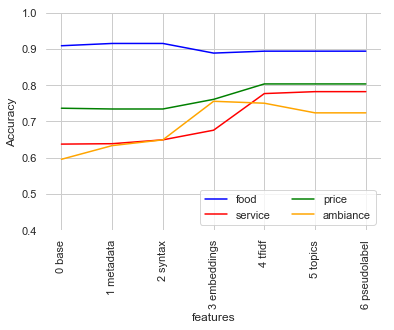

In [218]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="food", markers=True, data=df,
             color="blue", label="food")
sns.lineplot(x="features", y="service", markers=True, data=df,
             color="red", label="service")
sns.lineplot(x="features", y="price", markers=True, data=df,
             color="green", label="price")
sns.lineplot(x="features", y="ambiance", markers=True, data=df,
             color="orange", label="ambiance")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig("../../3_reports/figures/model_accuracy_20190613.png")